In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def showGraph(data):
    plt.plot(data)
    plt.show()
# convert dataset to x and y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
def relative_error(xs, ys):
    error = 0
    zero = 0
    for i in range(len(xs)):
        if ys[i] != 0:
            error += abs(xs[i]-ys[i])*100 / ys[i]
        else:
            zero += 1
    error /= (len(xs) - zero)
    return error

In [50]:
dataset = pandas.read_csv('data_stock_market.csv', usecols=[1])
data_standard = dataset

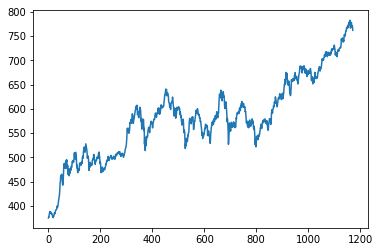

In [51]:
showGraph(dataset)

In [61]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset.loc[-1] = [max(dataset.values)*2]
dataset = scaler.fit_transform(dataset)
dataset = dataset[:-1]
showGraph(dataset)

,close_price
0,375.26
1,377.27
2,376.95
3,380.9
4,385.6
5,386.71
6,388.62
7,385.22
8,387.71
9,386.91


In [6]:
# split into train set and test set
train_size = int(len(dataset) * 0.67)
# train_size = int(lent(dataset))
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [7]:
# showGraph(train)
# showGraph(test)

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# This algorithm don't use LSTM network
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
2052/2052 [==============================] - 4s - loss: 0.0028     
Epoch 2/100
2052/2052 [==============================] - 2s - loss: 0.0011     
Epoch 3/100
2052/2052 [==============================] - 3s - loss: 8.2194e-05     
Epoch 4/100
2052/2052 [==============================] - 3s - loss: 1.7255e-05     
Epoch 5/100
2052/2052 [==============================] - 2s - loss: 1.9279e-05     
Epoch 6/100
2052/2052 [==============================] - 3s - loss: 1.9959e-05     
Epoch 7/100
2052/2052 [==============================] - 3s - loss: 2.0533e-05     
Epoch 8/100
2052/2052 [==============================] - 2s - loss: 1.9076e-05     
Epoch 9/100
2052/2052 [==============================] - 2s - loss: 1.9932e-05     
Epoch 10/100
2052/2052 [==============================] - 2s - loss: 1.9553e-05     
Epoch 11/100
2052/2052 [==============================] - 3s - loss: 1.8942e-05     
Epoch 12/100
2052/2052 [==============================] - 4s - loss: 2.0472e-05   

2052/2052 [==============================] - 3s - loss: 1.9836e-05     
Epoch 98/100
2052/2052 [==============================] - 3s - loss: 1.9256e-05     
Epoch 99/100
2052/2052 [==============================] - 2s - loss: 1.8678e-05     
Epoch 100/100
2052/2052 [==============================] - 3s - loss: 1.9369e-05     


In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredictT = scaler.inverse_transform(trainPredict)
trainYT = scaler.inverse_transform([trainY])
testPredictT = scaler.inverse_transform(testPredict)
testYT = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
trainScore = relative_error(trainYT[0], trainPredictT[:,0])
print('Train Score: %.2f ' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
testScore = relative_error(testYT[0], testPredictT[:,0])
print('Test Score: %.2f ' % (testScore))

Train Score: 0.94 
Test Score: 2.35 


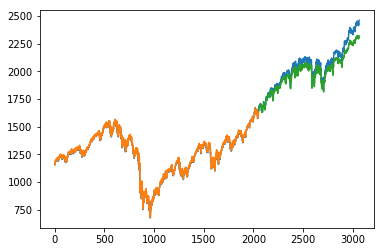

In [17]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredictT)+look_back, :] = trainPredictT
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredictT)+(look_back*2)+1:len(dataset)-1, :] = testPredictT
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [13]:
nexts = model.predict(testX[-1])
tomorrow_close_price = nexts[0][0] * max(data_standard.values)
print(tomorrow_close_price[0])

[ 1904.7142115]


In [14]:
trainYT

array([[ 1159.35998535,  1154.05004883,  1165.68994141, ...,
         1615.41003418,  1631.89001465,  1640.45996094]])

In [15]:
predictTrain = model.predict(trainX)
predictTrain = scaler.inverse_transform(predictTrain)

In [31]:
relative_error(predictTrain, trainYT[0])

TypeError: relative_error() got an unexpected keyword argument 'epochs'

In [38]:
model.fit(numpy.array([trainX[0]]), numpy.array([trainY[0]]), epochs=100, batch_size=1)
model.get_weights()

Epoch 1/100
1/1 [==============================] - 0s - loss: 7.4567e-11
Epoch 2/100
1/1 [==============================] - 0s - loss: 5.5783e-12
Epoch 3/100
1/1 [==============================] - 0s - loss: 1.1695e-11
Epoch 4/100
1/1 [==============================] - 0s - loss: 7.0256e-11
Epoch 5/100
1/1 [==============================] - 0s - loss: 1.4858e-10
Epoch 6/100
1/1 [==============================] - 0s - loss: 2.1108e-10
Epoch 7/100
1/1 [==============================] - 0s - loss: 2.3740e-10
Epoch 8/100
1/1 [==============================] - 0s - loss: 2.2094e-10
Epoch 9/100
1/1 [==============================] - 0s - loss: 1.7039e-10
Epoch 10/100
1/1 [==============================] - 0s - loss: 1.0618e-10
Epoch 11/100
1/1 [==============================] - 0s - loss: 4.8529e-11
Epoch 12/100
1/1 [==============================] - 0s - loss: 1.1341e-11
Epoch 13/100
1/1 [==============================] - 0s - loss: 2.2204e-14
Epoch 14/100
1/1 [=============================

[array([[ 2.32173419]], dtype=float32),
 array([-0.21830966], dtype=float32),
 array([[ 0.73101288, -1.83393037,  0.8685919 , -2.02085805]], dtype=float32),
 array([-0.79050732,  0.018216  , -0.06681606, -0.14030243], dtype=float32),
 array([[ 0.08217453],
        [-0.47011292],
        [ 0.58307439],
        [-0.16026458]], dtype=float32),
 array([ 0.09529925], dtype=float32)]

In [39]:
model.fit(numpy.array([trainX[0]]), numpy.array([trainY[0]]), epochs=100, batch_size=1)
model.get_weights()

Epoch 1/100
1/1 [==============================] - 0s - loss: 2.2204e-16
Epoch 2/100
1/1 [==============================] - 0s - loss: 3.5527e-15
Epoch 3/100
1/1 [==============================] - 0s - loss: 4.4964e-15
Epoch 4/100
1/1 [==============================] - 0s - loss: 5.5511e-15
Epoch 5/100
1/1 [==============================] - 0s - loss: 5.5511e-15
Epoch 6/100
1/1 [==============================] - 0s - loss: 5.5511e-15
Epoch 7/100
1/1 [==============================] - 0s - loss: 5.5511e-15
Epoch 8/100
1/1 [==============================] - 0s - loss: 4.4964e-15
Epoch 9/100
1/1 [==============================] - 0s - loss: 1.9984e-15
Epoch 10/100
1/1 [==============================] - 0s - loss: 1.3878e-15
Epoch 11/100
1/1 [==============================] - 0s - loss: 8.8818e-16
Epoch 12/100
1/1 [==============================] - 0s - loss: 4.9960e-16
Epoch 13/100
1/1 [==============================] - 0s - loss: 2.2204e-16
Epoch 14/100
1/1 [=============================

[array([[ 2.32173419]], dtype=float32),
 array([-0.21830967], dtype=float32),
 array([[ 0.73101288, -1.83393037,  0.8685919 , -2.02085805]], dtype=float32),
 array([-0.79050732,  0.01821598, -0.06681603, -0.14030242], dtype=float32),
 array([[ 0.08217457],
        [-0.47011292],
        [ 0.58307439],
        [-0.1602646 ]], dtype=float32),
 array([ 0.09529928], dtype=float32)]

In [90]:
numpy.array([trainX[0][0], trainX[1][0]])

array([ 0.1165382 ,  0.11376954])

In [134]:
model.predict(testX[0])[0][0]

0.23530447

In [74]:
a

array([[ 0.22093064]], dtype=float32)

In [92]:
a = [1,3]

In [119]:
testX[0]

array([ 0.22999672])

In [120]:
testY[0]

0.23527485286413369

In [125]:
model.fit(testX[0], numpy.array([testY[0]]), epochs=100, batch_size=1)

Epoch 1/100
1/1 [==============================] - 0s - loss: 3.2768e-05
Epoch 2/100
1/1 [==============================] - 0s - loss: 2.7060e-05
Epoch 3/100
1/1 [==============================] - 0s - loss: 1.7977e-05
Epoch 4/100
1/1 [==============================] - 0s - loss: 8.8424e-06
Epoch 5/100
1/1 [==============================] - 0s - loss: 2.4112e-06
Epoch 6/100
1/1 [==============================] - 0s - loss: 1.6130e-08
Epoch 7/100
1/1 [==============================] - 0s - loss: 1.3659e-06
Epoch 8/100
1/1 [==============================] - 0s - loss: 4.9490e-06
Epoch 9/100
1/1 [==============================] - 0s - loss: 8.7892e-06
Epoch 10/100
1/1 [==============================] - 0s - loss: 1.1225e-05
Epoch 11/100
1/1 [==============================] - 0s - loss: 1.1427e-05
Epoch 12/100
1/1 [==============================] - 0s - loss: 9.5340e-06
Epoch 13/100
1/1 [==============================] - 0s - loss: 6.4117e-06
Epoch 14/100
1/1 [=============================

In [98]:
a

[3, 4]

In [102]:
numpy.delete(testX, 0)

array([ 0.23527485,  0.23649304,  0.23703737, ...,  0.41211802,
        0.41629339,  0.4173726 ])

In [115]:
today = testX[0]
predict_tomorrow = model.predict(today)

In [116]:
today

array([ 0.22999672])

In [131]:
predict_tomorrow[0]

array([ 0.22557312], dtype=float32)

In [136]:
str(testY[0]) + 'a'

'0.235274852864a'